In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
shots_per_match_df = pd.read_csv('dataset/intersection/statsbomb_matches_shots/shots_per_match.csv')
execution_times_fft_df = pd.read_csv('execution_times_fft.csv')
execution_times_dp_df = pd.read_csv('execution_times_dp.csv')
algorithms_df = shots_per_match_df.merge(execution_times_fft_df, on='match_id', suffixes=('_shots', '_fft')).merge(execution_times_dp_df, suffixes=('_fft', '_dp'), on='match_id')

In [23]:
algorithms_df.head()

,match_id,shot_amnt_shots,shot_xgs_shots,shot_amnt_fft,shot_xgs_fft,poi_bin_pmf_fft,execution_time_ns_fft,shot_amnt,shot_xgs,poi_bin_pmf_dp,execution_time_ns_dp
0,3901178,26,"[0.06941039, 0.0186107, 0.15630959, 0.083843, ...",26,"[0.06941039, 0.0186107, 0.15630959, 0.083843, ...",[5.02014906e-02 1.70863556e-01 2.64307116e-01 ...,113609.06,26,"[0.06941039, 0.0186107, 0.15630959, 0.083843, ...","[0.05020149058603322, 0.17086355620372826, 0.2...",58322.61
1,3901260,27,"[0.061407533, 0.058513843, 0.11437155, 0.13995...",27,"[0.061407533, 0.058513843, 0.11437155, 0.13995...",[4.31218140e-02 1.50553299e-01 2.44602848e-01 ...,112997.33,27,"[0.061407533, 0.058513843, 0.11437155, 0.13995...","[0.043121814013490176, 0.1505532989728081, 0.2...",63559.64
2,3829470,24,"[0.034954578, 0.138583, 0.076472215, 0.0719371...",24,"[0.034954578, 0.138583, 0.076472215, 0.0719371...",[1.52458538e-01 3.09553671e-01 2.87699851e-01 ...,105931.36,24,"[0.034954578, 0.138583, 0.076472215, 0.0719371...","[0.1524585384456888, 0.30955367102742526, 0.28...",49980.74
3,3901259,27,"[0.03965849, 0.12084835, 0.087109014, 0.489420...",27,"[0.03965849, 0.12084835, 0.087109014, 0.489420...",[8.04151573e-03 6.32612724e-02 1.82911442e-01 ...,112897.22,27,"[0.03965849, 0.12084835, 0.087109014, 0.489420...","[0.008041515729487978, 0.06326127242687847, 0....",62414.74
4,3901263,26,"[0.071490705, 0.021571811, 0.19837026, 0.02750...",26,"[0.071490705, 0.021571811, 0.19837026, 0.02750...",[5.42175560e-02 1.73848564e-01 2.60093486e-01 ...,110340.60,26,"[0.071490705, 0.021571811, 0.19837026, 0.02750...","[0.05421755600530188, 0.17384856439953614, 0.2...",57972.99


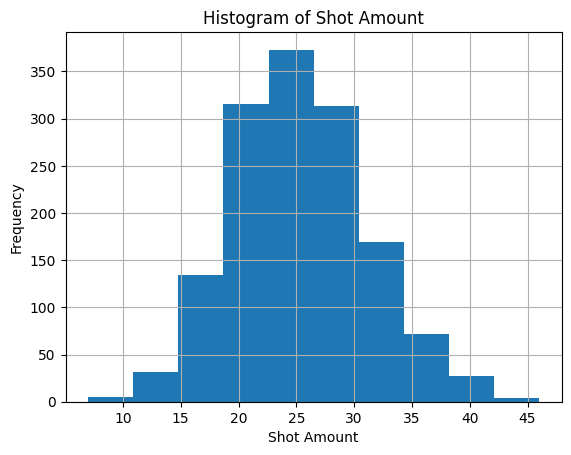

shots_per_match_mean=25.33056133056133
shots_per_match_std=5.924708028136919


In [24]:
algorithms_df['shot_amnt_shots'].hist()
plt.xlabel('Shot Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Shot Amount')
plt.show()

shots_per_match_mean = algorithms_df['shot_amnt_shots'].mean()
shots_per_match_std = algorithms_df['shot_amnt_shots'].std()

print(f'{shots_per_match_mean=}')
print(f'{shots_per_match_std=}')

Percentage of values within 1 standard deviation: 69.79%


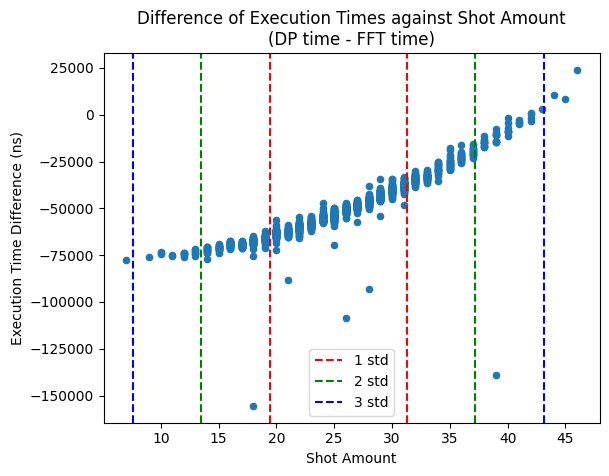

In [25]:
algorithms_df['execution_time_diff'] = algorithms_df['execution_time_ns_dp'] - algorithms_df['execution_time_ns_fft']
ax = algorithms_df.plot(x='shot_amnt_shots', y='execution_time_diff', kind='scatter')
plt.xlabel('Shot Amount')
plt.ylabel('Execution Time Difference (ns)')
plt.title('Difference of Execution Times against Shot Amount\n(DP time - FFT time)')

# Add vertical lines at 1, 2, and 3 standard deviations from the mean
mean = shots_per_match_mean
std = shots_per_match_std
ax.axvline(mean - std, color='r', linestyle='--', label='1 std')
ax.axvline(mean + std, color='r', linestyle='--')
ax.axvline(mean - 2 * std, color='g', linestyle='--', label='2 std')
ax.axvline(mean + 2 * std, color='g', linestyle='--')
ax.axvline(mean - 3 * std, color='b', linestyle='--', label='3 std')
ax.axvline(mean + 3 * std, color='b', linestyle='--')

# Calculate the percentage of values between the boundaries
lower_bound = mean - std
upper_bound = mean + std
percentage_within_bounds = ((algorithms_df['shot_amnt_shots'] >= lower_bound) & (algorithms_df['shot_amnt_shots'] <= upper_bound)).mean() * 100
print(f'Percentage of values within 1 standard deviation: {percentage_within_bounds:.2f}%')

plt.legend()
plt.show()
